<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.982 · TFM Àrea 5</p>
<p style="margin: 0; text-align:right;">2025/26 Màster Universitari en Ciència de Dades (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-bottom: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Gestió proactiva de la demanda en Atenció Precoç - Neteja i anàlisi exploratori (EDA)

## 1. Neteja de dades


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import datetime

sns.set_theme(style="whitegrid")
sns.set_context("notebook") 

In [3]:
df_cdiap = pd.read_csv("../dades/dades_cdiap.csv", sep=";")

Es realitza un primer anàlisi exploratori de les dades abans de la neteja i preprocessament.

In [5]:
df_cdiap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7502 entries, 0 to 7501
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Història                            7502 non-null   int64  
 1   Prioritat                           7502 non-null   object 
 2   Gravetat                            0 non-null      float64
 3   Districte                           271 non-null    object 
 4   Barri                               1132 non-null   object 
 5   Data de demanda                     7502 non-null   object 
 6   Edat a la demanda                   7502 non-null   object 
 7   Temps d'espera                      7452 non-null   float64
 8   Primera data d'acollida programada  7461 non-null   object 
 9   Data entrevista d'acollida          7452 non-null   object 
 10  Edat a l'acollida                   7452 non-null   object 
 11  Lloc de naixement                   5330 no

Segons l'observació hi ha camps amb molts valors nuls, com "Gravetat", "Districte", "Té elements de suport?", etc. A més, el tipus de dada de la majoria és "object"; per als models que desenvoluparem és necessari fer la transformació al tipus de dada "datetime".

Abans de la neteja es fa una observació prèvia de les dades.

In [7]:
df_cdiap.head(5)

,Història,Prioritat,Gravetat,Districte,Barri,Data de demanda,Edat a la demanda,Temps d'espera,Primera data d'acollida programada,Data entrevista d'acollida,...,Lloc de naixement (resp. 2),Antena,Escola bressol,Escola,Motiu 1,Altres (motiu 1),Motiu 2,Altres (motiu 2),Derivant,Derivació altres
0,0,Normal,NaN,NaN,NaN,16/11/2023,"1 any, 4 mesos",NaN,15/12/2023,NaN,...,NaN,Tarragona,NaN,NaN,Atenció / Conducta,NaN,NaN,NaN,ABS / CAP,NaN
1,0,Normal,NaN,NaN,NaN,17/11/2023,"4 anys, 0 mesos",NaN,17/11/2023,NaN,...,NaN,Torreforta,NaN,Els Àngels (Esc),Atenció / Conducta,NaN,NaN,NaN,ABS / CAP,NaN
2,0,Normal,NaN,NaN,NaN,21/11/2023,"4 anys, 10 mesos",NaN,21/11/2023,NaN,...,NaN,Torreforta,NaN,Sant Bernat Calvó (Esc),Llenguatge / Parla,NaN,NaN,NaN,ABS / CAP,NaN
3,0,Urgent,NaN,NaN,NaN,08/01/2024,"0 anys, 2 mesos",NaN,17/01/2024,NaN,...,NaN,Torreforta,NaN,NaN,Desenvolupament Motriu,NaN,NaN,NaN,Hospital,NaN
4,0,Normal,NaN,NaN,NaN,30/11/2023,"3 anys, 1 mes",NaN,29/01/2024,NaN,...,NaN,Tarragona,NaN,La Portalada (Esc),Atenció / Conducta,NaN,NaN,NaN,ABS / CAP,NaN


Les primeres files es corresponen a usuaris que han fet la demanda, però encara no s'han visitat, per tant, no tenen número d'història.

In [9]:
df_cdiap.tail()

,Història,Prioritat,Gravetat,Districte,Barri,Data de demanda,Edat a la demanda,Temps d'espera,Primera data d'acollida programada,Data entrevista d'acollida,...,Lloc de naixement (resp. 2),Antena,Escola bressol,Escola,Motiu 1,Altres (motiu 1),Motiu 2,Altres (motiu 2),Derivant,Derivació altres
7497,8065,Normal,NaN,NaN,NaN,13/11/2025,"3 anys, 10 mesos",27.0,02/12/2025,10/12/2025,...,NaN,Tarragona,NaN,Antoni Roig (Esc),Atenció / Conducta,NaN,NaN,NaN,ABS / CAP,NaN
7498,8066,Normal,NaN,NaN,NaN,18/11/2025,"4 anys, 3 mesos",22.0,10/12/2025,10/12/2025,...,NaN,Tarragona,NaN,Marcel·lí Domingo (Esc),Atenció / Conducta,NaN,NaN,NaN,EAP / Escola,NaN
7499,8067,Normal,NaN,NaN,NaN,17/11/2025,"2 anys, 3 mesos",24.0,11/12/2025,11/12/2025,...,NaN,Tarragona,NaN,NaN,Altres,NaN,NaN,NaN,Altres,NaN
7500,8068,Normal,NaN,NaN,NaN,20/11/2025,"3 anys, 1 mes",21.0,11/12/2025,11/12/2025,...,NaN,Torreforta,NaN,Bonavista (Esc),Atenció / Conducta,NaN,NaN,NaN,EAP / Escola,NaN
7501,8069,Normal,NaN,NaN,NaN,20/11/2025,"2 anys, 1 mes",21.0,11/12/2025,11/12/2025,...,NaN,Torreforta,NaN,Bonavista (Esc),Atenció / Conducta,NaN,NaN,NaN,EAP / Escola,NaN


Les últimes files es corresponen als últims usuaris, com veiem, la data de la primera acollida (primera visita que fan al centre) correspon el desembre de 2025.

In [11]:
a = len(df_cdiap)/2
b = (len(df_cdiap)/2) + 4
df_cdiap.loc[a:b]

,Història,Prioritat,Gravetat,Districte,Barri,Data de demanda,Edat a la demanda,Temps d'espera,Primera data d'acollida programada,Data entrevista d'acollida,...,Lloc de naixement (resp. 2),Antena,Escola bressol,Escola,Motiu 1,Altres (motiu 1),Motiu 2,Altres (motiu 2),Derivant,Derivació altres
3751,4319,Normal,NaN,NaN,NaN,28/04/2017,"2 anys, 0 mesos",54.0,21/06/2017,21/06/2017,...,El Catllar,NaN,L'Agulla del Catllar (LlI),L'Agulla (I-E),Llenguatge / Parla,NaN,NaN,NaN,ABS / CAP,NaN
3752,4320,Normal,NaN,NaN,TORREFORTA,31/03/2017,"3 anys, 1 mes",82.0,21/06/2017,21/06/2017,...,NaN,NaN,Bonavista (Llar),L'Agulla (I-E),Llenguatge / Parla,NaN,NaN,NaN,ABS / CAP,NaN
3753,4321,Normal,NaN,NaN,NaN,03/04/2017,"3 anys, 5 mesos",81.0,23/06/2017,23/06/2017,...,El Pla de Santa Maria,NaN,NaN,L'Arrabassada (I-E),Llenguatge / Parla,NaN,NaN,NaN,EAP / Escola,NaN
3754,4322,Normal,NaN,NaN,NaN,24/04/2017,"2 anys, 7 mesos",70.0,03/07/2017,03/07/2017,...,Tarragona,NaN,No escolaritzat,Santa Maria del Mar (Esc),Llenguatge / Parla,NaN,NaN,NaN,ABS / CAP,NaN
3755,4323,Normal,NaN,NaN,NaN,06/04/2017,"3 anys, 3 mesos",88.0,03/07/2017,03/07/2017,...,Huesca,NaN,NaN,La Canaleta (Esc),Retard desenvolupament global,NaN,NaN,NaN,ABS / CAP,NaN


A la secció central s'observen valors de l'any 2017. 
L'any d'inici de la sèrie temporal de la data de la demanda és el 1994.
La majoria de les dades corresponen al període dels últims 10 anys.

In [13]:
# És procedeix a l'eliminació de les columnes amb poca informació:
df_cdiap.drop(columns=["Gravetat", "Districte", "Barri",
                       "Té elements de suport ?", "Altres (motiu 1)", 
                       "Motiu 2", "Altres (motiu 2)", 
                       "Derivació altres"], inplace=True)

In [14]:
# S'eliminem els usuaris amb número d'història "0" i que no han fet encara acollida
df_cdiap = df_cdiap[df_cdiap["Història"] != 0]
df_cdiap = df_cdiap[df_cdiap["Edat a l'acollida"].notna()]

In [15]:
# S'assigna el tipus de dada "datetime" a les variables temporals:
df_cdiap["Data de demanda"] = pd.to_datetime(df_cdiap["Data de demanda"], errors="coerce", format="%d/%m/%Y")
df_cdiap["Primera data d'acollida programada"] = pd.to_datetime(df_cdiap["Primera data d'acollida programada"], errors="coerce", format="%d/%m/%Y")
df_cdiap["Data entrevista d'acollida"] = pd.to_datetime(df_cdiap["Data entrevista d'acollida"], errors="coerce", format="%d/%m/%Y")
df_cdiap["Data de naixement"] = pd.to_datetime(df_cdiap["Data de naixement"], errors="coerce", format="%d/%m/%Y")
df_cdiap["Data naixement (resp. 1)"] = pd.to_datetime(df_cdiap["Data naixement (resp. 1)"], errors="coerce", format="%d/%m/%Y")
df_cdiap["Data naixement (resp. 2)"] = pd.to_datetime(df_cdiap["Data naixement (resp. 2)"], errors="coerce", format="%d/%m/%Y")

In [16]:
# Es crea una nova columna per agregar mensualment
df_cdiap["Mes de demanda"] = df_cdiap["Data de demanda"].dt.to_period("M")

# Columna per agregar setmanalment
df_cdiap["Setmana de demanda"] = df_cdiap["Data de demanda"].dt.to_period("W-MON")

In [17]:
# Les columnes de l'edat a la demanda i l'acollida es transformen a nombres decimals
def convertir_anys_decimals(edat_str):
    
    match = re.match(r"(-?\d+)\s*anys?,\s*(-?\d+)\s*mes(os)?", edat_str)
    
    if match:
        anys = int(match.group(1))
        mesos = int(match.group(2))

        # Hi han edats com "-1 anys, -1 mesos" a eliminar
        if anys < 0 or mesos < 0:
            return None 
        
        return anys + mesos / 12 # Calculem l'edat en decimals
    else:
        return None

# Es canvia l'edat a les dues columnes
df_cdiap["Edat a la demanda"] = df_cdiap["Edat a la demanda"].apply(convertir_anys_decimals)
df_cdiap["Edat a l'acollida"] = df_cdiap["Edat a l'acollida"].apply(convertir_anys_decimals)

# S'eliminen les errònies
df_cdiap = df_cdiap.dropna(subset=["Edat a la demanda", "Edat a l'acollida"])

Es realitza una primera gràfica per a observar l'evolució de la demanda.

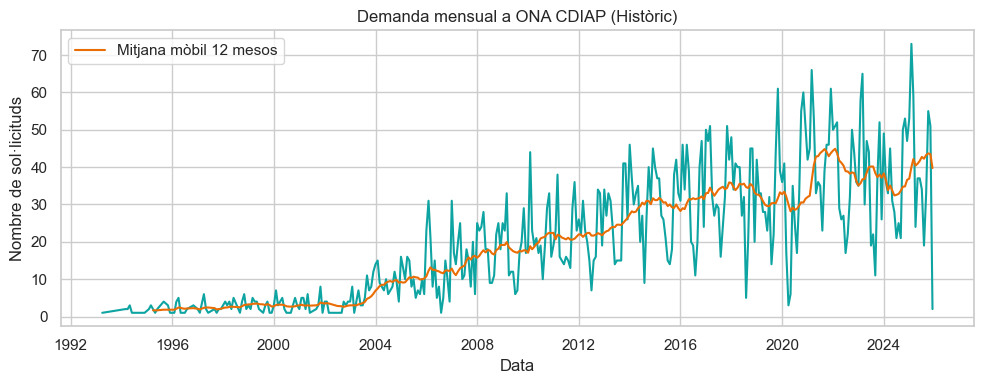

In [19]:
agrupació_mensual = (
    df_cdiap
    .groupby("Mes de demanda")
    .size()
    .reset_index(name="Nombre de demandes")
)

agrupació_mensual["MM_12"] = agrupació_mensual["Nombre de demandes"].rolling(12).mean()

agrupació_mensual["Mes de demanda"] = agrupació_mensual["Mes de demanda"].dt.to_timestamp()

sns.set_theme(style="whitegrid")
sns.set_context("notebook")

plt.figure(figsize=(10, 4))
sns.lineplot(data=agrupació_mensual, x="Mes de demanda", y="Nombre de demandes", color="#0da4a2")
sns.lineplot(data=agrupació_mensual, x="Mes de demanda", y="MM_12", label="Mitjana mòbil 12 mesos", 
             color="#ea6d04")

plt.title("Demanda mensual a ONA CDIAP (Històric)")
plt.xlabel("Data")
plt.ylabel("Nombre de sol·licituds")

plt.tight_layout()
plt.show()


S'observa un fort augment del nombre de sol·licituds de demanda al llarg dels anys, i un component estacional potent.

A partir de 2017 és quan tenim la meitat de les dades, que es correspon amb un augment de la digitalització a l'empresa.

A partir del 2020 es va donar més importància al treball amb les dades i la integritat d'aquestes, per aquesta raó i per poder elaborar un model predictiu sòlid, es fa una selecció dels últims 5 anys.

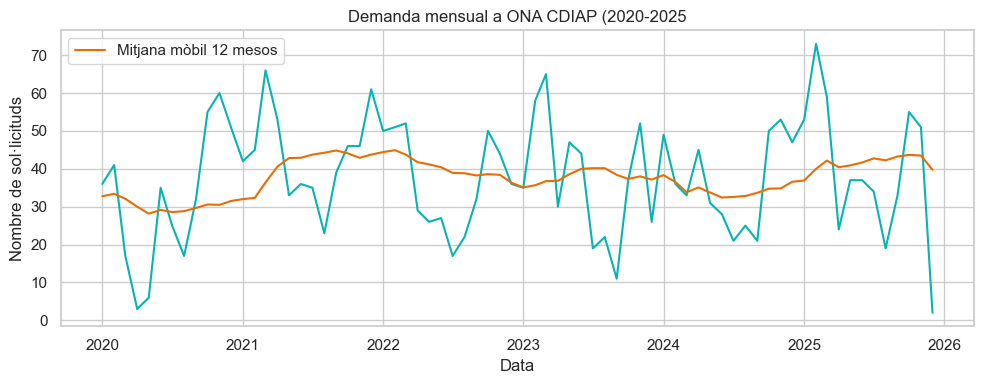

In [21]:
# Observem la demanda als últims 5 anys
agrupació_mensual_2020_2025 = agrupació_mensual[agrupació_mensual["Mes de demanda"] >= "2020-01-01"]

plt.figure(figsize=(10, 4))
sns.lineplot(data=agrupació_mensual_2020_2025, x="Mes de demanda", y="Nombre de demandes", color="#07b4b1")
sns.lineplot(data=agrupació_mensual_2020_2025, x="Mes de demanda", y="MM_12", label="Mitjana mòbil 12 mesos", 
             color="#ea6d04")
plt.title("Demanda mensual a ONA CDIAP (2020-2025")
plt.xlabel("Data")
plt.ylabel("Nombre de sol·licituds")

plt.tight_layout()
plt.show()

S'observa una caiguda significativa en la demanda a partir de 2020, coincidint amb l'inici de la pandèmia de la COVID-19. 

En aquest rang de dates més curt, és evident una variació més gran en la demanda, mostrant fortes fluctuacions, algunes que podríem explicar per l'estacionalitat del servei (si no hi ha escola, aquesta no fa derivacions).

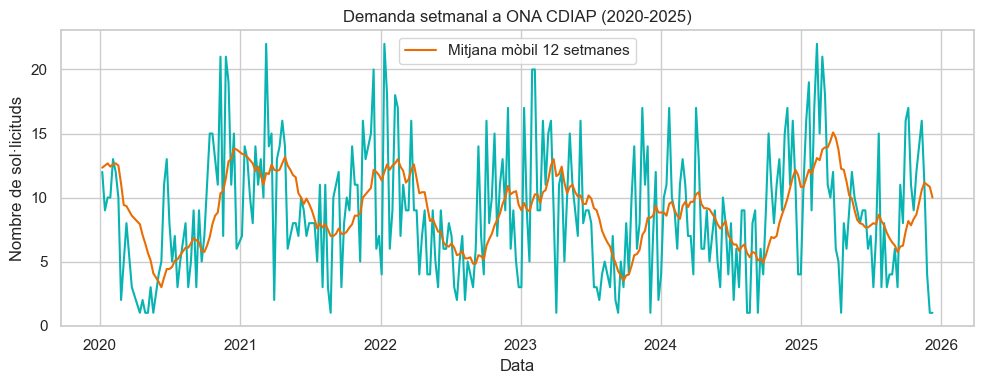

In [23]:
agrupació_setmanal = (
    df_cdiap
    .groupby("Setmana de demanda")
    .size()
    .reset_index(name="Nombre de demandes")
)
agrupació_setmanal["MM_12"] = agrupació_setmanal["Nombre de demandes"].rolling(12).mean()

agrupació_setmanal["Setmana de demanda"] = agrupació_setmanal["Setmana de demanda"].dt.to_timestamp()

agrupació_setmanal_2020_2025 = agrupació_setmanal[agrupació_setmanal["Setmana de demanda"] >= "2020-01-01"]


plt.figure(figsize=(10, 4))
sns.lineplot(data=agrupació_setmanal_2020_2025, x="Setmana de demanda", y="Nombre de demandes", color="#07b4b1")
sns.lineplot(data=agrupació_setmanal_2020_2025, x="Setmana de demanda", y="MM_12", label="Mitjana mòbil 12 setmanes", 
             color="#ea6d04")

plt.title("Demanda setmanal a ONA CDIAP (2020-2025)")
plt.xlabel("Data")
plt.ylabel("Nombre de sol·licituds")

plt.tight_layout()
plt.show()


Si s'observa la demanda amb una granularitat més baixa, a escala setmanal, les fluctuacions són més evidents, amb fortes variacions encara més visibles entres setmanes, explicables com s'ha comentat per la relació del servei amb el treball amb infants.

In [25]:
# S'extrauen les dades dels últims 5 anys
df_cdiap_5 = df_cdiap[df_cdiap["Mes de demanda"] >= "2020-01-01"]

In [26]:
df_cdiap_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 4761 to 7501
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Història                            2701 non-null   int64         
 1   Prioritat                           2701 non-null   object        
 2   Data de demanda                     2701 non-null   datetime64[ns]
 3   Edat a la demanda                   2701 non-null   float64       
 4   Temps d'espera                      2701 non-null   float64       
 5   Primera data d'acollida programada  2672 non-null   datetime64[ns]
 6   Data entrevista d'acollida          2701 non-null   datetime64[ns]
 7   Edat a l'acollida                   2701 non-null   float64       
 8   Lloc de naixement                   2547 non-null   object        
 9   Pais d'origen                       2701 non-null   object        
 10  Data de naixement         

Obtenim una selecció de 2701 usuaris per als últims 5 anys. Amb aquesta es procedeix a l'anàlisi exploratòria.

## 2. Anàlisi Exploratori de Dades (EDA)


La següent secció fa un breu repàs sobre les variables del conjunt de dades en el període 2020-2025 i la seva interacció, per entendre millor les característiques dels usuaris que fan demanda al servei.

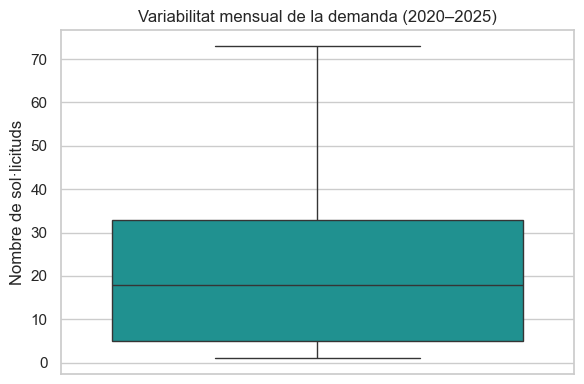

In [30]:
# Variabilitat mensual a la demanda
plt.figure(figsize=(6, 4))
sns.boxplot(y=agrupació_mensual["Nombre de demandes"], color="#0da4a2")

plt.title("Variabilitat mensual de la demanda (2020–2025)")
plt.ylabel("Nombre de sol·licituds")
plt.tight_layout()
plt.show()

S'observa una forta variabilitat a la demanda mensual, amb un valor central entre 36 i 38, i valors mitjans en el rang de 36 i 50 aproximadament. Valors de més de 70 indiquen períodes extraordinaris de forta pressió a la demanda.

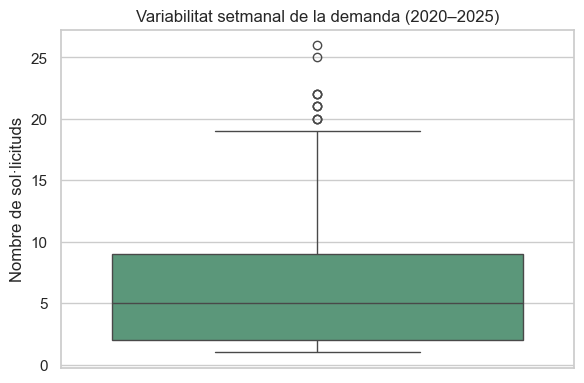

In [32]:
# Variabilitat setmanal a la demanda
plt.figure(figsize=(6, 4))
sns.boxplot(y=agrupació_setmanal["Nombre de demandes"], color="#51a17a")

plt.title("Variabilitat setmanal de la demanda (2020–2025)")
plt.ylabel("Nombre de sol·licituds")
plt.tight_layout()
plt.show()


Quant a la variabilitat de la demanda setmanal es veu una distribució mitjana clara a les 5 demandes setmanals, amb valors atípics molt elevats que indiquen grans pics puntuals i de pressió en el fenomen.

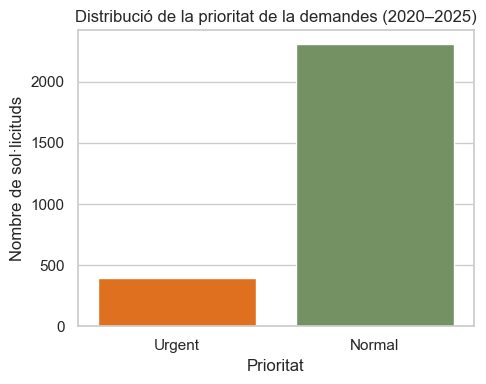

In [34]:
# Prioritat a la demanda
plt.figure(figsize=(5, 4))
sns.countplot(
    data=df_cdiap_5,
    x="Prioritat",
    hue="Prioritat",
    palette=["#ff6b00", "#70995b"]
)

plt.title("Distribució de la prioritat de la demandes (2020–2025)")
plt.xlabel("Prioritat")
plt.ylabel("Nombre de sol·licituds")

plt.tight_layout()
plt.show()

Pel que fa a la prioritat, els casos urgents representen una minoria. Aquests casos corresponen a infants menors d'un any, que segons el protocol del CDIAP tenen prioritat automàticament.

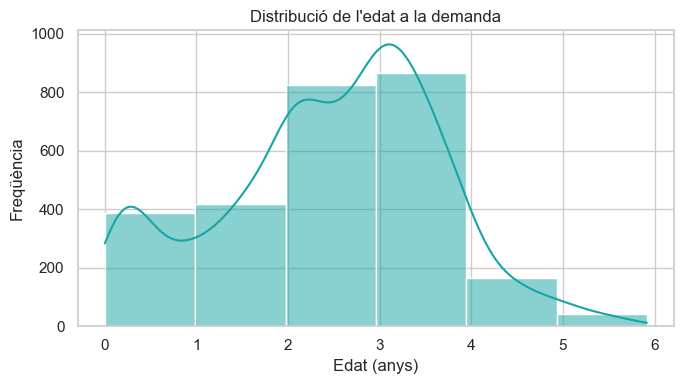

In [36]:
# Distribució de l'edat a la demanda
plt.figure(figsize=(7, 4))
sns.histplot(
    df_cdiap_5["Edat a la demanda"], 
    bins=6, 
    kde=True, 
    color="#15a5a3")

plt.title("Distribució de l'edat a la demanda (2020–2025)")
plt.xlabel("Edat (anys)")
plt.ylabel("Freqüència")
plt.tight_layout()
plt.show()

Una concentració al voltant dels 2 i els 3 anys en el moment de fer la demanda és fàcilment visible. Un fet explicatiu és l'observació de la presència o absència de les fites del desenvolupament en els nens per part dels professionals.

A escala d'organització en l'àmbit d'empresa, s'ha de destacar que fins al 2024 l'atenció es prioritzava sobre els infants de fins a 4 anys, raó per la qual no hi ha prou dades per a infants de 4 a 6 anys.

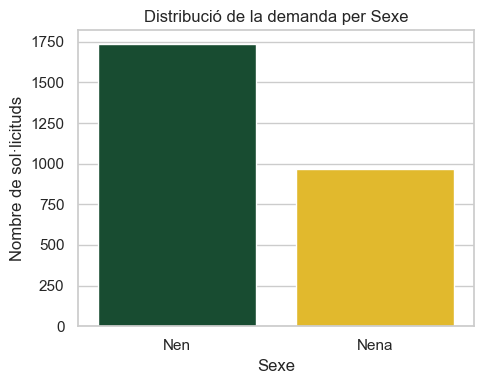

In [38]:
# Demanda segons sexe de l'infant
plt.figure(figsize=(5, 4))
sns.countplot(
    data=df_cdiap_5,
    x="Sexe",
    hue="Sexe",
    palette=["#105431", "#ffca0f"],
    legend=False
)

plt.title("Distribució de la demanda per Sexe (2020–2025)")
plt.xlabel("Sexe")
plt.ylabel("Nombre de sol·licituds")
plt.tight_layout()
plt.show()

En la demanda s'observa una proporció més gran de nens respecte a nenes, un fenomen que altres serveis d'atenció precoç comparteixen.

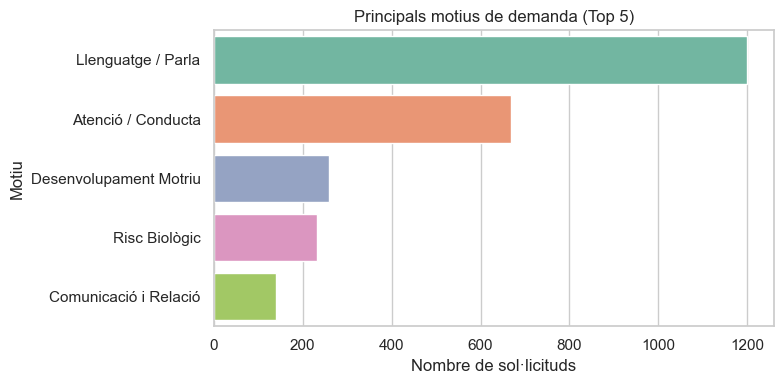

In [40]:
# Gràfica dels 5 motius principals de derivació
top_motius = df_cdiap_5["Motiu 1"].value_counts().head(5)

plt.figure(figsize=(8, 4))
sns.barplot(
    x=top_motius.values,
    y=top_motius.index,
    hue=top_motius.index,
    palette="Set2"
)

plt.title("Principals motius de demanda (Top 5)")
plt.xlabel("Nombre de sol·licituds")
plt.ylabel("Motiu")
plt.tight_layout()
plt.show()


El principal motiu de demanda són els trastorns del llenguatge i la parla, seguits dels d'atenció i conducta. Aquestes categories representen la majoria dels casos i poden esdevenir una variable exploratòria pel model predictor de la demanda.

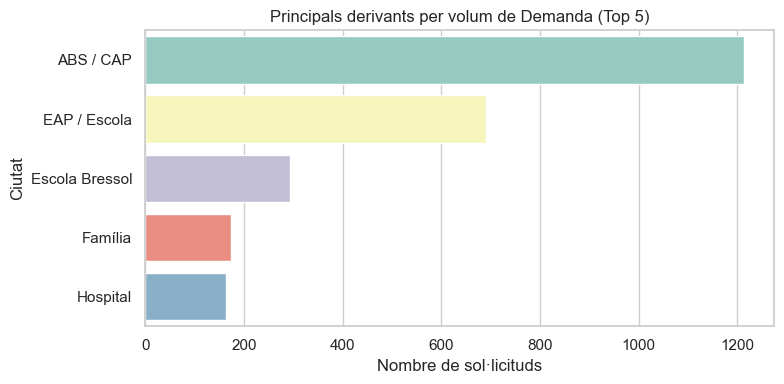

In [42]:
# Selecció dels 5 derivants més rellevants
top_derivants = df_cdiap_5["Derivant"].value_counts().head(5)

plt.figure(figsize=(8, 4))
sns.barplot(
    x=top_derivants.values,
    y=top_derivants.index,
    hue=top_derivants.index, 
    palette="Set3"

)

plt.title("Principals derivants per volum de Demanda (Top 5)")
plt.xlabel("Nombre de sol·licituds")
plt.ylabel("Ciutat")
plt.tight_layout()
plt.show()

La gran part de les derivacions provenen del centre de salut d'atenció primària (Àrees Bàsiques de Salut i Centres d'Atenció Primària). A continuació, els Equips d'Assessorament i Orientació Psicopedagògica (EAP), conjuntament amb les escoles, constitueixen les entitats que realitzen més derivacions. Les escoles bressol també tenen un pes rellevant. Finalment, es troben les derivacions per iniciativa familiar i, en darrer lloc, les procedents de l’hospital, que habitualment corresponen a casos urgents associats a risc biològic.

Finalitzem l’anàlisi exploratòria del conjunt de dades, que s’exporten seguidament per a la posterior fase de modelització. En funció del model seleccionat, serà necessari aplicar preprocessaments addicionals, com ara la codificació one-hot, normalització, etc.:

In [45]:
df_cdiap_5.to_csv("../dades/df_cdiap_raw_2020_25.csv", sep=";", index=False, encoding="utf-8")


In [46]:
df_cdiap_5.to_pickle("../dades/df_cdiap_raw_2020_25.pkl")
